In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics.regression import mean_squared_error

import pandas as pd

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Bagging neural nets

In [4]:
df_concrete = pd.read_excel('/Users/artonson/Downloads/Concrete_Data.xls')

In [5]:
df_concrete

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [6]:
X3 = df_concrete.as_matrix()[:, :-1]
y3 = df_concrete.as_matrix()[:, -1]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [7]:
X3_train.shape

(824, 8)

In [8]:
nets = []
train_errors = []
test_errors = []
for net_index in xrange(20):
    net = MLPRegressor(hidden_layer_sizes=(16,16),
                       solver='lbfgs',
                       alpha=0.0,
                       verbose=True)
    net.fit(X3_train, y3_train)
    train_errors.append(np.sqrt(mean_squared_error(y3_train, net.predict(X3_train))))
    test_errors.append(np.sqrt(mean_squared_error(y3_test, net.predict(X3_test))))
    print 'Net {} quality:'.format(net_index + 1)
    print '    train: {0:.3f}'.format(train_errors[-1])
    print '    test: {0:.3f}'.format(test_errors[-1])
    print 
    nets.append(net)

Net 1 quality:
    train: 10.350
    test: 10.482

Net 2 quality:
    train: 7.280
    test: 7.678

Net 3 quality:
    train: 6.570
    test: 6.918

Net 4 quality:
    train: 6.840
    test: 7.213

Net 5 quality:
    train: 7.976
    test: 7.759

Net 6 quality:
    train: 7.010
    test: 7.189

Net 7 quality:
    train: 6.987
    test: 7.442

Net 8 quality:
    train: 6.687
    test: 7.283

Net 9 quality:
    train: 6.857
    test: 7.208

Net 10 quality:
    train: 6.780
    test: 7.201

Net 11 quality:
    train: 7.540
    test: 8.152

Net 12 quality:
    train: 6.810
    test: 7.021

Net 13 quality:
    train: 6.584
    test: 6.808

Net 14 quality:
    train: 6.808
    test: 6.835

Net 15 quality:
    train: 6.831
    test: 6.901

Net 16 quality:
    train: 8.740
    test: 8.646

Net 17 quality:
    train: 7.001
    test: 7.411

Net 18 quality:
    train: 6.892
    test: 7.149

Net 19 quality:
    train: 6.934
    test: 7.279

Net 20 quality:
    train: 7.214
    test: 7.198



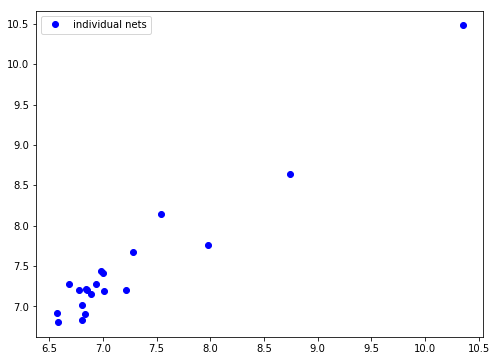

In [9]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
legend(loc='best')

### Averaging all of the nets

In [10]:
y_pred_test_average = []
y_pred_train_average = []
for net in nets:
    y_pred_net = net.predict(X3_train)
    y_pred_train_average.append(y_pred_net)
    y_pred_net = net.predict(X3_test)
    y_pred_test_average.append(y_pred_net)
    
y_pred_train_avg = np.mean(y_pred_train_average, axis=0)
y_pred_test_avg = np.mean(y_pred_test_average, axis=0)
train_avg_error = np.sqrt(mean_squared_error(y3_train, y_pred_train_avg))
test_avg_error = np.sqrt(mean_squared_error(y3_test, y_pred_test_avg))

print 'Averaging quality:'
print '    train: {0:.3f}'.format(train_avg_error)
print '    test: {0:.3f}'.format(test_avg_error)

Averaging quality:
    train: 6.669
    test: 6.841


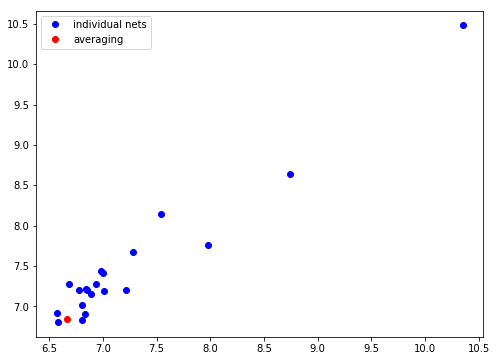

In [11]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
plot([train_avg_error], [test_avg_error], 'ro', label='averaging')
legend(loc='best')

### The best learner

In [12]:
best_net = nets[np.argmin(train_errors)]

y_pred_best_train = best_net.predict(X3_train)
y_pred_best_test = best_net.predict(X3_test)
train_best_error = np.sqrt(mean_squared_error(y3_train, y_pred_best_train))
test_best_error = np.sqrt(mean_squared_error(y3_test, y_pred_best_test))

print 'Averaging quality:'
print '    train: {0:.3f}'.format(train_best_error)
print '    test: {0:.3f}'.format(test_best_error)

Averaging quality:
    train: 6.570
    test: 6.918


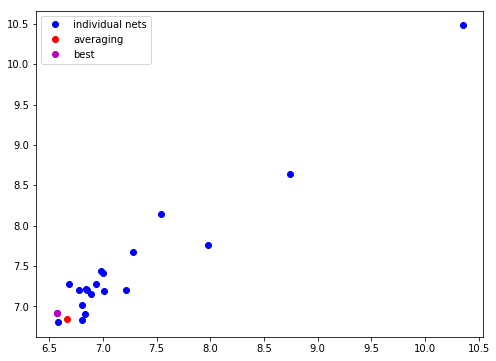

In [13]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
plot([train_avg_error], [test_avg_error], 'ro', label='averaging')
plot([train_best_error], [test_best_error], 'mo', label='best')
legend(loc='best')

### Averaging top-k best nets

In [14]:
y_pred_train_average = []
y_pred_test_average = []

train_topk_errors = []
test_topk_errors = []
for best_nets_index in np.argsort(train_errors):
    net = nets[best_nets_index]
    
    y_pred_net = net.predict(X3_train)
    y_pred_train_average.append(y_pred_net)
    y_pred_net = net.predict(X3_test)
    y_pred_test_average.append(y_pred_net)
    
    y_pred_train_avg = np.mean(y_pred_train_average, axis=0)
    y_pred_test_avg = np.mean(y_pred_test_average, axis=0)
    
    train_topk_errors.append(np.sqrt(mean_squared_error(y3_train, y_pred_train_avg)))
    test_topk_errors.append(np.sqrt(mean_squared_error(y3_test, y_pred_test_avg)))

    print 'Averaging top {}:'.format(len(y_pred_train_average))
    print '    train: {0:.3f}'.format(train_topk_errors[-1])
    print '    test:  {0:.3f}'.format(test_topk_errors[-1])
    print

Averaging top 1:
    train: 6.570
    test:  6.918

Averaging top 2:
    train: 6.370
    test:  6.675

Averaging top 3:
    train: 6.360
    test:  6.765

Averaging top 4:
    train: 6.414
    test:  6.816

Averaging top 5:
    train: 6.446
    test:  6.758

Averaging top 6:
    train: 6.485
    test:  6.778

Averaging top 7:
    train: 6.508
    test:  6.768

Averaging top 8:
    train: 6.533
    test:  6.807

Averaging top 9:
    train: 6.530
    test:  6.804

Averaging top 10:
    train: 6.533
    test:  6.804

Averaging top 11:
    train: 6.558
    test:  6.835

Averaging top 12:
    train: 6.552
    test:  6.847

Averaging top 13:
    train: 6.572
    test:  6.872

Averaging top 14:
    train: 6.560
    test:  6.841

Averaging top 15:
    train: 6.565
    test:  6.817

Averaging top 16:
    train: 6.568
    test:  6.830

Averaging top 17:
    train: 6.561
    test:  6.852

Averaging top 18:
    train: 6.584
    test:  6.839

Averaging top 19:
    train: 6.616
    test:  6.828

Av

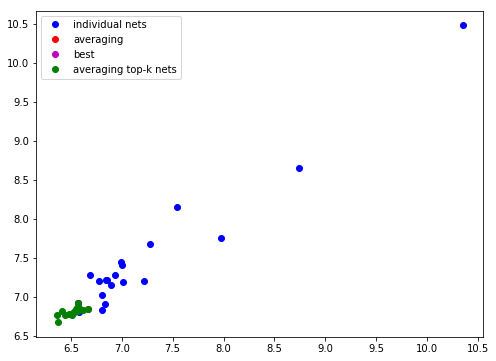

In [15]:
figure(figsize=(8,6))
plot(train_errors, test_errors, 'bo', label='individual nets')
plot([train_avg_error], [test_avg_error], 'ro', label='averaging')
plot([train_best_error], [test_best_error], 'mo', label='best')
plot(train_topk_errors, test_topk_errors, 'go', label='averaging top-k nets')
legend(loc='best')